# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [106]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Innomatics_Data_Science_Internship/EDA_Project/AMEO_Dataset.csv")

In [107]:
data.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [108]:
data.tail()

Unnamed: 0      ID    Salary           DOJ           DOL  \
3993      train   47916  280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781  100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888  320000.0   7/1/13 0:00       present   
3996      train  947111  200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966  400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  
3997      1.32553                -0.6035  

[5 rows x 39 columns]

In [109]:
data.shape

(3998, 39)

In [110]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

# Data Preprocessing

**Data Preprocessing Overview**

In the process of preparing our dataset for analysis, we have undertaken several key steps to ensure that the data is structured, consistent, and ready for exploration. Below, we outline the purpose and methodology behind each step of the data preprocessing phase.


---


**Column Renaming**
**Purpose**: Provides a more descriptive and meaningful name for the column.

In this step, we have renamed certain columns within our dataset to offer clearer insights into the information they contain. By providing more descriptive column names, we aim to enhance understanding and facilitate smoother data analysis processes.


---

**Date Conversion**
**Purpose**: Enables proper handling and analysis of date-related information.

We have converted date-related columns within the dataset into a standardized format to ensure consistency and accuracy in our analysis. By converting these dates into a recognizable format, we are better equipped to perform temporal analyses and derive meaningful insights from time-related data.


---


**Handling 'Present' Values in 'DOL'**
**Purpose**: Represents ongoing or indefinite employment periods consistently.

To maintain consistency in our dataset, we have addressed instances where the value "present" was used to denote ongoing employment. By replacing these occurrences with a standardized end date value (e.g., '9999-12-31'), we ensure uniformity in representing employment periods, thereby facilitating accurate analysis and interpretation of employment durations.


---


**Creating 'EmploymentStatus' Column**
**Purpose**: Provides a clear indication of the current employment status.

To enhance the clarity of our dataset, we have introduced a new column named 'EmploymentStatus'. This column categorizes individuals based on their current employment status, distinguishing between those who are presently employed and those who have left their positions. By explicitly stating the employment status, we enable easier segmentation and analysis of workforce dynamics.


---


**Column Removal**
**Purpose**: Eliminates redundant or irrelevant information.

In our efforts to streamline the dataset and focus on pertinent information, we have identified and removed columns that were deemed redundant or irrelevant to our analysis objectives. This ensures that the remaining dataset is concise, relevant, and conducive to meaningful exploration and interpretation.


---


**Calculating 'YearsOfExperience'**
**Purpose**: Provides a numerical representation of the number of years of experience.

By calculating the 'YearsOfExperience' for each individual based on their date of joining (DOJ), we aim to quantify and standardize the measure of professional experience. This numerical representation enables more precise analysis and comparison of individuals' experience levels, facilitating insights into the workforce's expertise distribution.


---


Through these meticulous preprocessing steps, we have prepared our dataset for further analysis, ensuring that it is structured, consistent, and conducive to deriving meaningful insights. The standardized format, clear labeling, and focused data content lay the foundation for robust and insightful exploratory data analysis.

In [112]:
data.rename(columns={'Unnamed: 0': 'DataSource'}, inplace=True)

In [113]:
data['DOJ'] = pd.to_datetime(data['DOJ'])

In [114]:
data['DOL'] = data['DOL'].replace('present', '9999-12-31')
data['DOL'] = pd.to_datetime(data['DOL'], errors='coerce')

In [115]:
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')

In [116]:
data['EmploymentStatus'] = 'Present'
data.loc[data['DOL'].notna(), 'EmploymentStatus'] = 'Left'

In [117]:
data.drop(columns=['DataSource','ID'], inplace=True)

In [118]:
data['YearsOfExperience'] = (pd.Timestamp.now() - data['DOJ']).dt.days // 365

In [119]:
data

Salary        DOJ        DOL                  Designation  \
0      420000.0 2012-06-01        NaT      senior quality engineer   
1      500000.0 2013-09-01        NaT            assistant manager   
2      325000.0 2014-06-01        NaT             systems engineer   
3     1100000.0 2011-07-01        NaT     senior software engineer   
4      200000.0 2014-03-01 2015-03-01                          get   
...         ...        ...        ...                          ...   
3993   280000.0 2011-10-01 2012-10-01            software engineer   
3994   100000.0 2013-07-01 2013-07-01             technical writer   
3995   320000.0 2013-07-01        NaT  associate software engineer   
3996   200000.0 2014-07-01 2015-01-01           software developer   
3997   400000.0 2013-02-01        NaT      senior systems engineer   

               JobCity Gender        DOB  10percentage  \
0            Bangalore      f 1990-02-19         84.30   
1               Indore      m 1989-10-04         85.40   
2              Chennai      f 1992-08-03         85.00   
3              Gurgaon      m 1989-12-05         85.60   
4              Manesar      m 1991-02-27         78.00   
...                ...    ...        ...           ...   
3993        New Delhi       m 1987-04-15         52.09   
3994         Hyderabad      f 1992-08-27         90.00   
3995         Bangalore      m 1991-07-03         81.86   
3996  Asifabadbanglore      f 1992-03-20         78.72   
3997           Chennai      f 1991-02-26         70.60   

                             10board  12graduation  ...  ElectricalEngg  \
0     board ofsecondary education,ap          2007  ...              -1   
1                               cbse          2007  ...              -1   
2                               cbse          2010  ...              -1   
3                               cbse          2007  ...              -1   
4                               cbse          2008  ...              -1   
...                              ...           ...  ...             ...   
3993                            cbse          2006  ...              -1   
3994                     state board          2009  ...              -1   
3995                      bse,odisha          2008  ...              -1   
3996                     state board          2010  ...              -1   
3997                            cbse          2008  ...              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  EmploymentStatus YearsOfExperience  
0         1.35490                -0.4455           Present                11  
1        -0.10760                 0.8637           Present                10  
2        -0.86820                 0.6721           Present                 9  
3        -0.40780                -0.9194           Present                12  
4         0.09163                -0.1295              Left                10  
...           ...                    ...               ...               ...  
3993      0.64980                -0.9194              Left                12  
3994      0.7

In [120]:
data.shape

(3998, 39)

In [121]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'EmploymentStatus', 'YearsOfExperience'],
      dtype='object')

In [122]:
data.iloc[[3900, 3920], 10:30]

12percentage      12board  CollegeID  CollegeTier       Degree  \
3900         69.12  state board       1401            1  B.Tech/B.E.   
3920         63.00         chse        124            2  B.Tech/B.E.   

                               Specialization  collegeGPA  CollegeCityID  \
3900  instrumentation and control engineering        62.0           1401   
3920                     computer engineering        63.0            124   

      CollegeCityTier CollegeState  GraduationYear  English  Logical  Quant  \
3900                0       Punjab            2013      475      500    635   
3920                0       Orissa            2010      575      415    465   

        Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
3900 -1.000000                  365                     -1              315   
3920  0.735796                  475                     -1               -1   

      MechanicalEngg  ElectricalEngg  
3900              -1              -1  
3920              -1              -1

In [123]:
data['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

# Exploratory Data Analysis

In [124]:
data.describe()

Salary  10percentage  12graduation  12percentage     CollegeID  \
count  3.998000e+03   3998.000000   3998.000000   3998.000000   3998.000000   
mean   3.076998e+05     77.925443   2008.087544     74.466366   5156.851426   
std    2.127375e+05      9.850162      1.653599     10.999933   4802.261482   
min    3.500000e+04     43.000000   1995.000000     40.000000      2.000000   
25%    1.800000e+05     71.680000   2007.000000     66.000000    494.000000   
50%    3.000000e+05     79.150000   2008.000000     74.400000   3879.000000   
75%    3.700000e+05     85.670000   2009.000000     82.600000   8818.000000   
max    4.000000e+06     97.760000   2013.000000     98.700000  18409.000000   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  3998.000000  3998.000000    3998.000000      3998.000000   
mean      1.925713    71.486171    5156.851426         0.300400   
std       0.262270     8.167338    4802.261482         0.458489   
min       1.000000     6.450000       2.000000         0.000000   
25%       2.000000    66.407500     494.000000         0.000000   
50%       2.000000    71.720000    3879.000000         0.000000   
75%       2.000000    76.327500    8818.000000         1.000000   
max       2.000000    99.930000   18409.000000         1.000000   

       GraduationYear  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count     3998.000000  ...     3998.000000     3998.000000  3998.000000   
mean      2012.105803  ...       22.974737       16.478739    31.851176   
std         31.857271  ...       98.123311       87.585634   104.852845   
min          0.000000  ...       -1.000000       -1.000000    -1.000000   
25%       2012.000000  ...       -1.000000       -1.000000    -1.000000   
50%       2013.000000  ...       -1.000000       -1.000000    -1.000000   
75%       2014.000000  ...       -1.000000       -1.000000    -1.000000   
max       2017.000000  ...      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  YearsOfExperience  
count  3998.000000            3998.000000        3998.000000  
mean     -0.169033              -0.138110          10.204352  
std       1.007580               1.008075           1.309694  
min      -2.643000              -7.375700           8.000000  
25%      -0.868200              -0.669200           9.000000  
50%      -0.234400              -0.094300          10.000000  
75%       0.526200               0.502400          11.000000  
max       3.352500               1.822400          32.000000  

[8 rows x 27 columns]

In [125]:
data.replace(-1, 0, inplace=True)

In [126]:
data

Salary        DOJ        DOL                  Designation  \
0      420000.0 2012-06-01        NaT      senior quality engineer   
1      500000.0 2013-09-01        NaT            assistant manager   
2      325000.0 2014-06-01        NaT             systems engineer   
3     1100000.0 2011-07-01        NaT     senior software engineer   
4      200000.0 2014-03-01 2015-03-01                          get   
...         ...        ...        ...                          ...   
3993   280000.0 2011-10-01 2012-10-01            software engineer   
3994   100000.0 2013-07-01 2013-07-01             technical writer   
3995   320000.0 2013-07-01        NaT  associate software engineer   
3996   200000.0 2014-07-01 2015-01-01           software developer   
3997   400000.0 2013-02-01        NaT      senior systems engineer   

               JobCity Gender        DOB  10percentage  \
0            Bangalore      f 1990-02-19         84.30   
1               Indore      m 1989-10-04         85.40   
2              Chennai      f 1992-08-03         85.00   
3              Gurgaon      m 1989-12-05         85.60   
4              Manesar      m 1991-02-27         78.00   
...                ...    ...        ...           ...   
3993        New Delhi       m 1987-04-15         52.09   
3994         Hyderabad      f 1992-08-27         90.00   
3995         Bangalore      m 1991-07-03         81.86   
3996  Asifabadbanglore      f 1992-03-20         78.72   
3997           Chennai      f 1991-02-26         70.60   

                             10board  12graduation  ...  ElectricalEngg  \
0     board ofsecondary education,ap          2007  ...               0   
1                               cbse          2007  ...               0   
2                               cbse          2010  ...               0   
3                               cbse          2007  ...               0   
4                               cbse          2008  ...               0   
...                              ...           ...  ...             ...   
3993                            cbse          2006  ...               0   
3994                     state board          2009  ...               0   
3995                      bse,odisha          2008  ...               0   
3996                     state board          2010  ...               0   
3997                            cbse          2008  ...               0   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0              0          0             0.9737        0.8128       0.5269   
1              0          0            -0.7335        0.3789       1.2396   
2              0          0             0.2718        1.7109       0.1637   
3              0          0             0.0464        0.3448      -0.3440   
4              0          0            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993           0          0            -0.1082        0.3448       0.2366   
3994           0          0            -0.3027        0.8784       0.9322   
3995           0          0            -1.5765       -1.5273      -1.5051   
3996           0          0            -0.1590        0.0459      -0.4511   
3997           0          0            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  EmploymentStatus YearsOfExperience  
0         1.35490                -0.4455           Present                11  
1        -0.10760                 0.8637           Present                10  
2        -0.86820                 0.6721           Present                 9  
3        -0.40780                -0.9194           Present                12  
4         0.09163                -0.1295              Left                10  
...           ...                    ...               ...               ...  
3993      0.64980                -0.9194              Left                12  
3994      0.7

In [127]:
data[['MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].head(30)

MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg
0                0               0            0          0
1                0               0            0          0
2                0               0            0          0
3                0               0            0          0
4                0               0            0          0
5                0               0            0          0
6                0               0            0          0
7              469               0            0          0
8                0               0            0          0
9                0               0            0          0
10               0               0            0          0
11               0               0            0          0
12               0               0          206          0
13               0               0            0          0
14               0               0            0          0
15               0               0            0          0
16               0               0            0          0
17               0               0            0          0
18               0               0            0          0
19               0               0            0          0
20               0               0            0          0
21               0               0            0          0
22               0               0            0          0
23               0               0            0          0
24               0               0            0          0
25               0               0            0          0
26             313               0            0        320
27               0               0            0          0
28               0               0          313          0
29               0               0            0          0

In [128]:
data.isna().sum()

Salary                      0
DOJ                         0
DOL                      1875
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscientiousness           0
agreeablen

In [129]:
data[['DOL']]

DOL
0           NaT
1           NaT
2           NaT
3           NaT
4    2015-03-01
...         ...
3993 2012-10-01
3994 2013-07-01
3995        NaT
3996 2015-01-01
3997        NaT

[3998 rows x 1 columns]

In [130]:
data.replace(pd.NaT, 'Not Applicable', inplace=True)

In [131]:
data.describe()

Salary  10percentage  12graduation  12percentage     CollegeID  \
count  3.998000e+03   3998.000000   3998.000000   3998.000000   3998.000000   
mean   3.076998e+05     77.925443   2008.087544     74.466366   5156.851426   
std    2.127375e+05      9.850162      1.653599     10.999933   4802.261482   
min    3.500000e+04     43.000000   1995.000000     40.000000      2.000000   
25%    1.800000e+05     71.680000   2007.000000     66.000000    494.000000   
50%    3.000000e+05     79.150000   2008.000000     74.400000   3879.000000   
75%    3.700000e+05     85.670000   2009.000000     82.600000   8818.000000   
max    4.000000e+06     97.760000   2013.000000     98.700000  18409.000000   

       CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count  3998.000000  3998.000000    3998.000000      3998.000000   
mean      1.925713    71.486171    5156.851426         0.300400   
std       0.262270     8.167338    4802.261482         0.458489   
min       1.000000     6.450000       2.000000         0.000000   
25%       2.000000    66.407500     494.000000         0.000000   
50%       2.000000    71.720000    3879.000000         0.000000   
75%       2.000000    76.327500    8818.000000         1.000000   
max       2.000000    99.930000   18409.000000         1.000000   

       GraduationYear  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count     3998.000000  ...     3998.000000     3998.000000  3998.000000   
mean      2012.105803  ...       23.915958       17.438469    32.757629   
std         31.857271  ...       97.893295       87.394072   104.568796   
min          0.000000  ...        0.000000        0.000000     0.000000   
25%       2012.000000  ...        0.000000        0.000000     0.000000   
50%       2013.000000  ...        0.000000        0.000000     0.000000   
75%       2014.000000  ...        0.000000        0.000000     0.000000   
max       2017.000000  ...      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      3.673337          -0.037831       0.146496      0.002763   
std      36.559052           1.028666       0.941782      0.951471   
min       0.000000          -4.126700      -5.781600     -4.600900   
25%       0.000000          -0.713525      -0.287100     -0.604800   
50%       0.000000           0.046400       0.212400      0.091400   
75%       0.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  YearsOfExperience  
count  3998.000000            3998.000000        3998.000000  
mean     -0.169033              -0.138110          10.204352  
std       1.007580               1.008075           1.309694  
min      -2.643000              -7.375700           8.000000  
25%      -0.868200              -0.669200           9.000000  
50%      -0.234400              -0.094300          10.000000  
75%       0.526200               0.502400          11.000000  
max       3.352500               1.822400          32.000000  

[8 rows x 27 columns]

In [132]:
# Statistical Summary
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    print(f"Summary for {column}:")
    print(data[column].describe())

Summary for Salary:
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64
Summary for 10percentage:
count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64
Summary for 12graduation:
count    3998.000000
mean     2008.087544
std         1.653599
min      1995.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2013.000000
Name: 12graduation, dtype: float64
Summary for 12percentage:
count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64
Summary for CollegeID:
count     3998.000000
mean      5156.851426
std       4802.261482

In [133]:
# Frequency Distribution of Categorical Variables
for column in data.select_dtypes(include='object').columns:
    print(f"Frequency Distribution for {column}:")
    print(data[column].value_counts())

Frequency Distribution for DOL:
Not Applicable         1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64
Frequency Distribution for Designation:
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64
Frequency Distribution for JobCity:
Bangalore           627
-1                  461
Noid

# Univariate Analysis

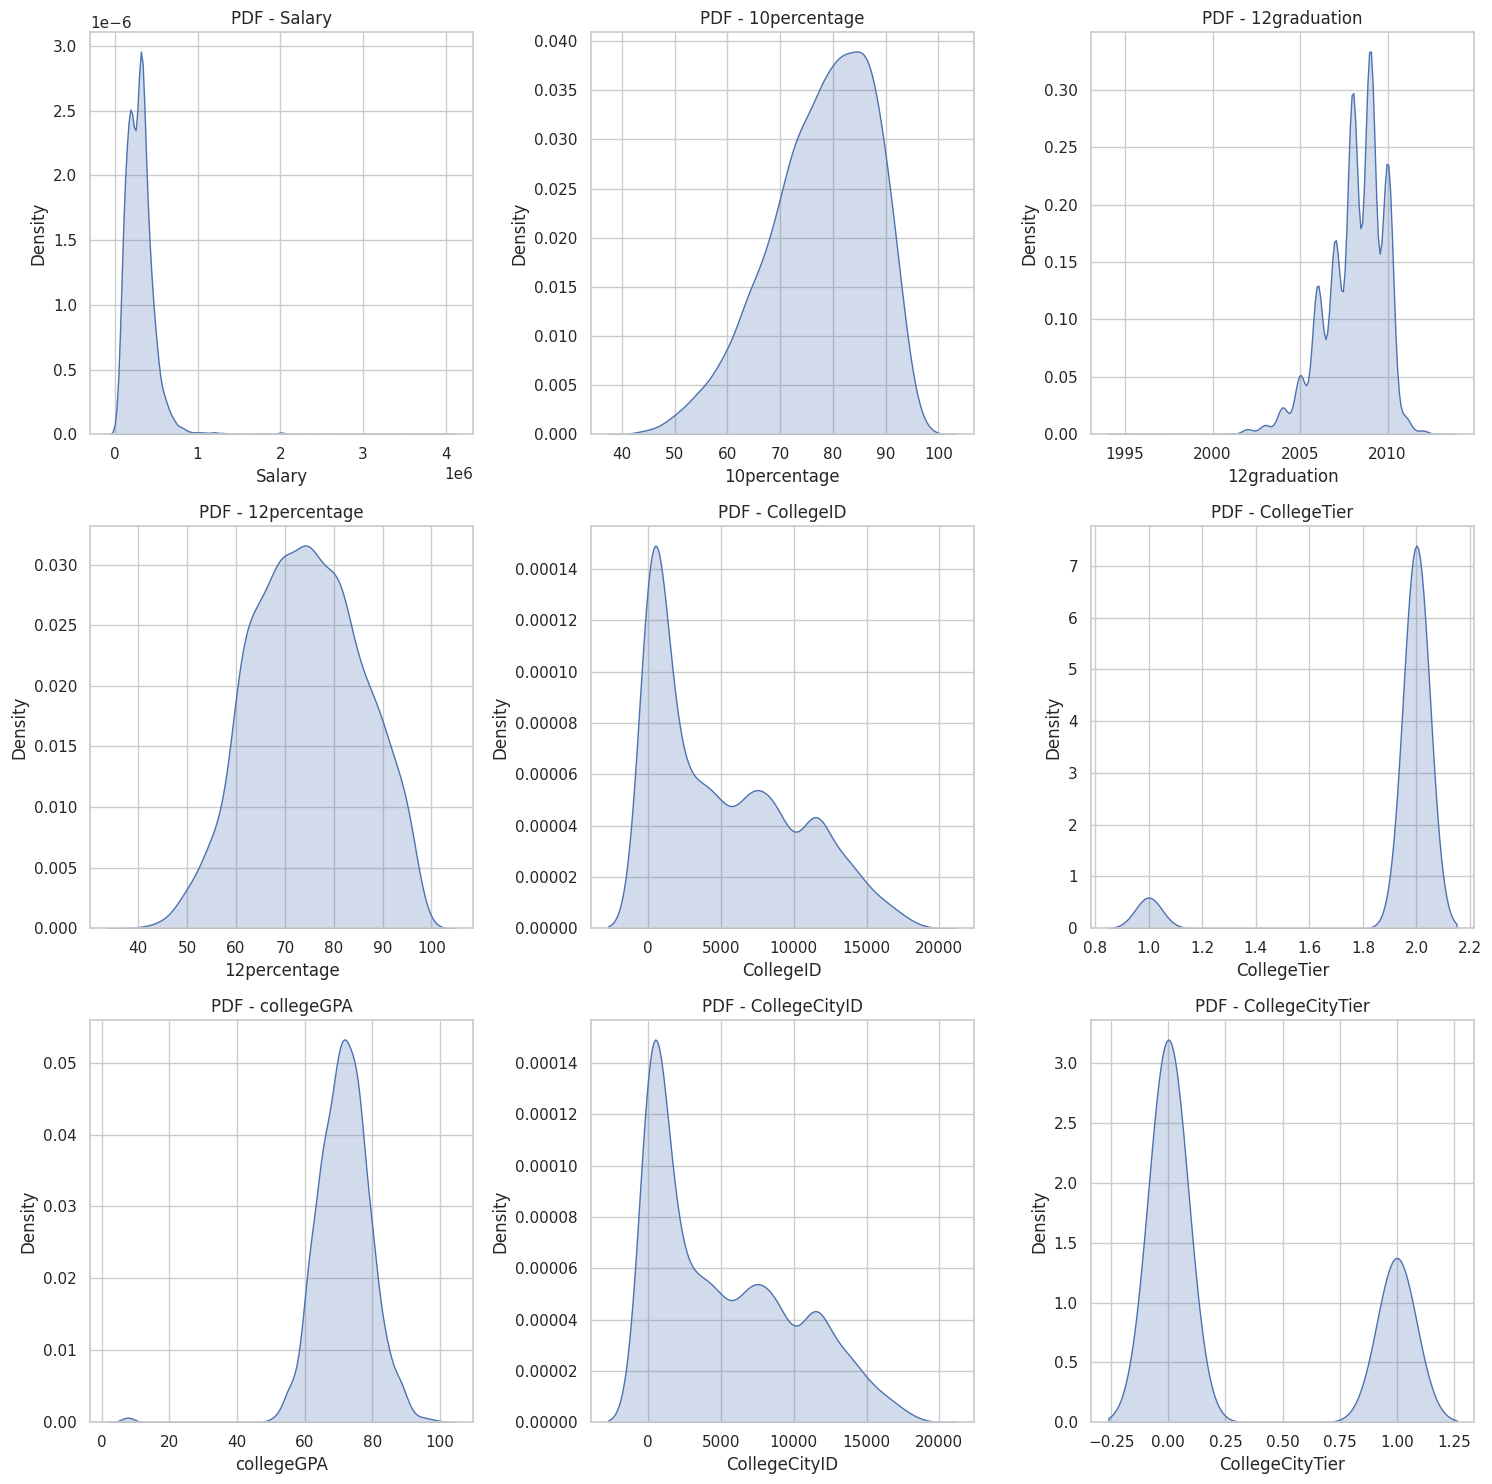

In [134]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_columns_to_visualize = min(len(numerical_columns), 9)

# PDF with KDE using Seaborn
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns[:num_columns_to_visualize]):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[column], fill=True, legend=False)
    plt.title(f'PDF - {column}')
plt.tight_layout()
plt.show()

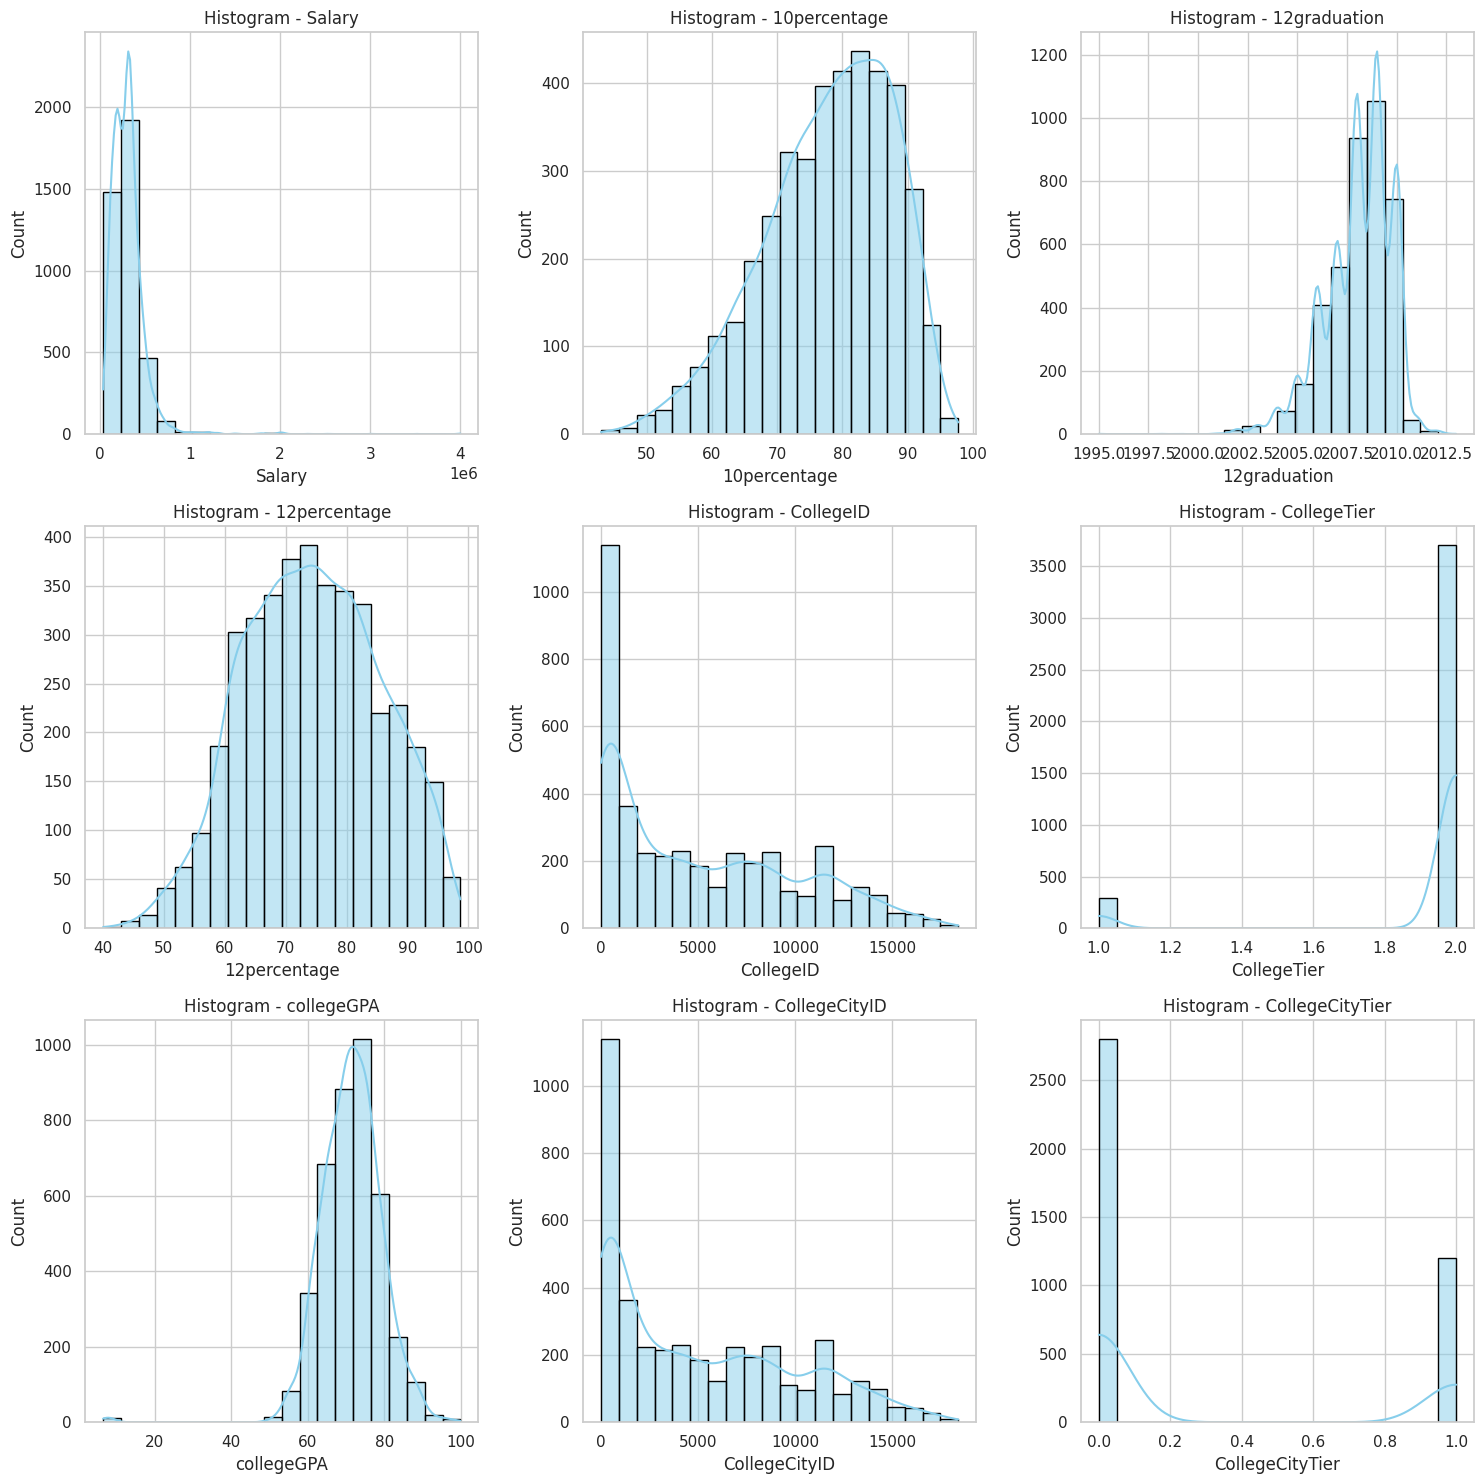

In [135]:
# Univariate Analysis - Histograms with KDE using Seaborn
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns[:num_columns_to_visualize]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram - {column}')
plt.tight_layout()
plt.show()

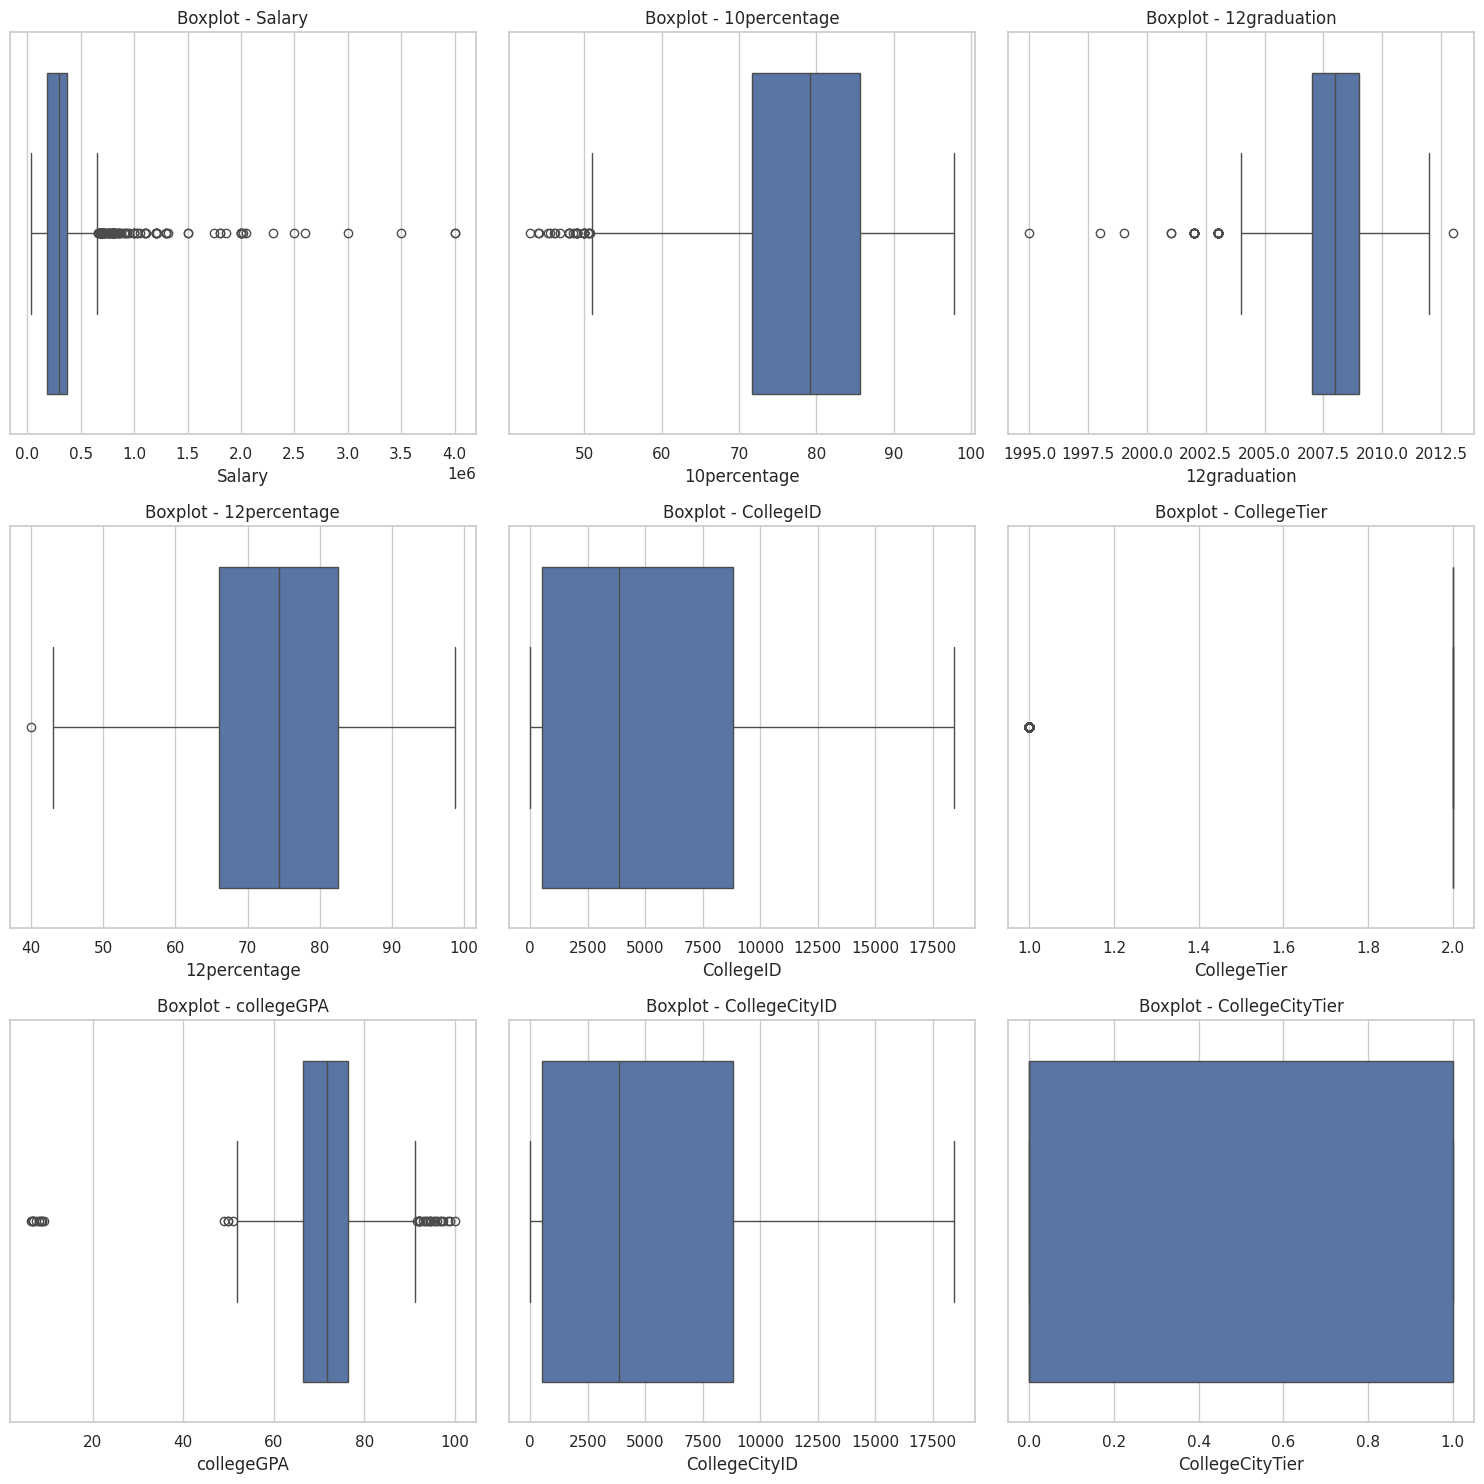

In [136]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
total_numerical_columns = len(numerical_columns)
rows = 3
cols = 3

# Boxplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i, column in enumerate(numerical_columns):
    if i < rows * cols:
        row_num = i // cols
        col_num = i % cols
        sns.boxplot(x=data[column], ax=axes[row_num, col_num])
        axes[row_num, col_num].set_title(f'Boxplot - {column}')

plt.tight_layout()
plt.show()

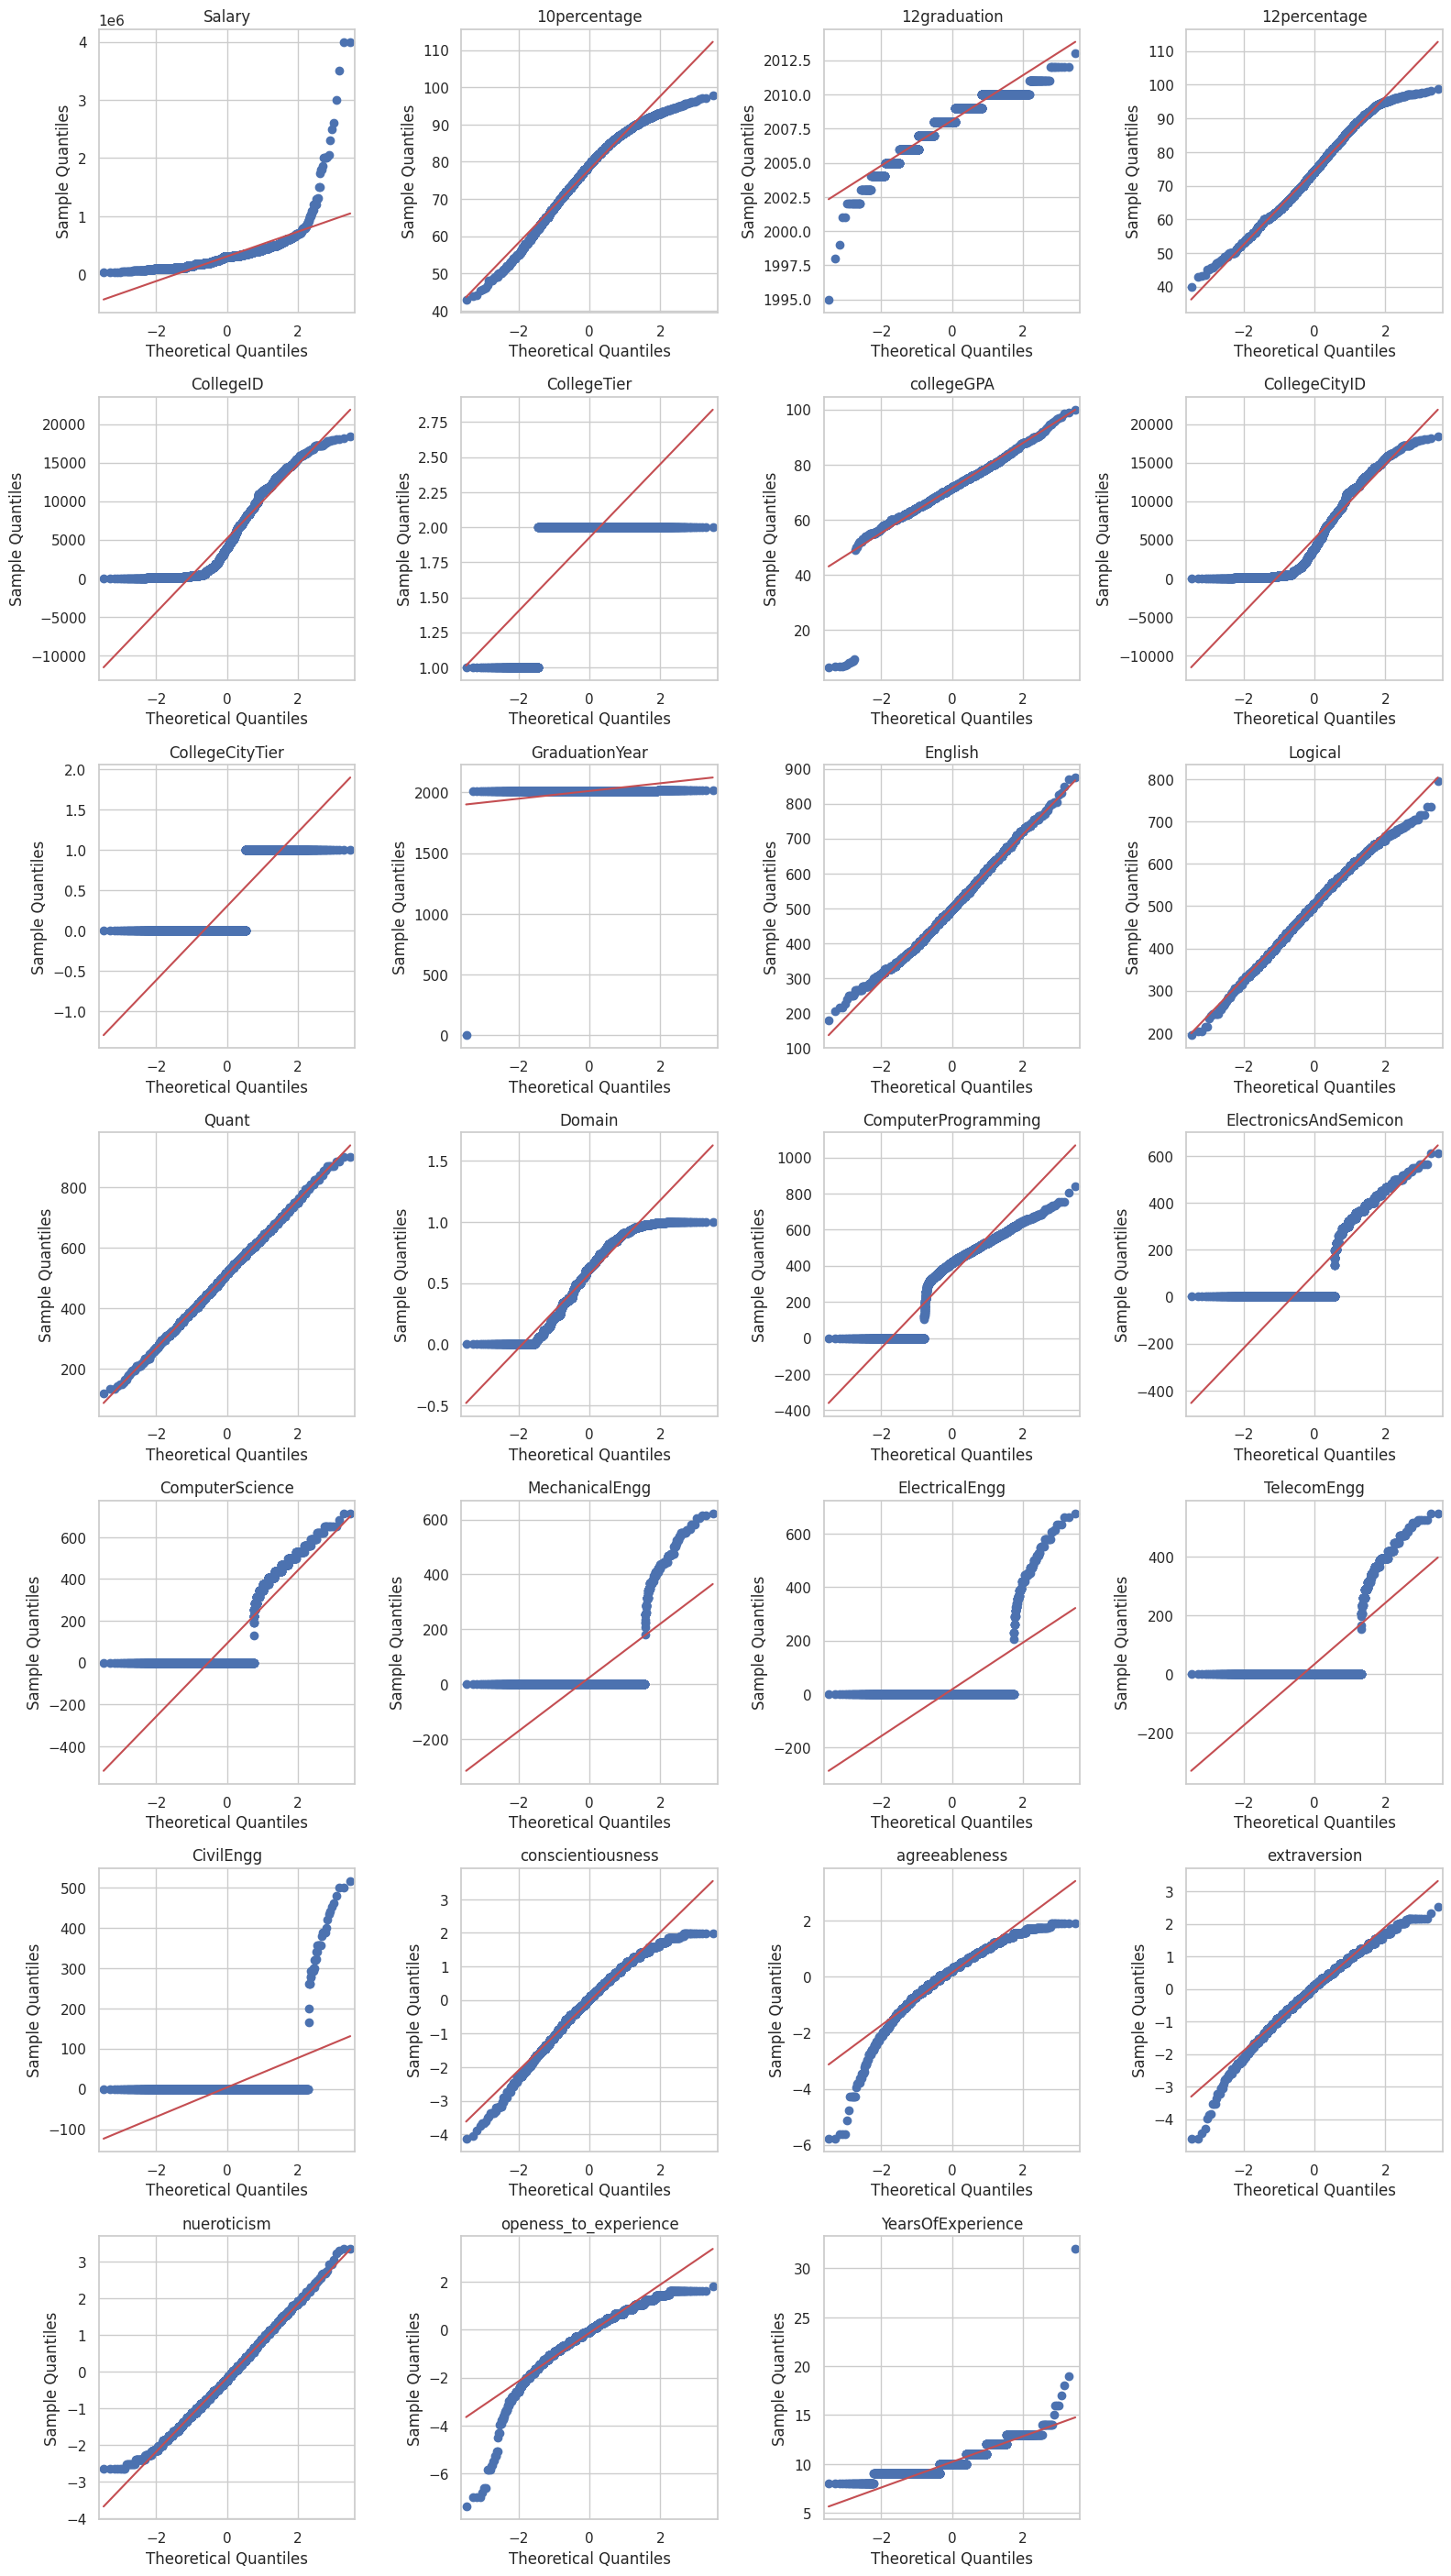

In [137]:
numerical_columns = data.select_dtypes(include=['number']).columns
num_cols = len(numerical_columns)

# Quantile-Quantile (QQ) plots
plt.figure(figsize=(16, 4 * num_cols))
sns.set(style="whitegrid")  # Set the style for the plots

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_cols, 4, i)
    sm.qqplot(data[column], line='s', ax=plt.gca())
    plt.title(column)

plt.tight_layout()
plt.show()

# Countplot for Gender and Degree

In [138]:
# Define a custom color palette for better visualization
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for column in ['Gender', 'Degree']:
    fig = px.bar(data, x=column, title=f'Countplot - {column}',
                 labels={column: column},
                 color=column,
                 color_discrete_sequence=color_palette,
                 category_orders={column: sorted(data[column].unique())})

    fig.update_layout(
        xaxis_title=column,
        yaxis_title='Count',
        showlegend=False
    )

    fig.show()

In [139]:
# The above Shows the Male Gender counts are High and most of the students are from Btech/BE Background

<ipython-input-140-286b8241f031>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




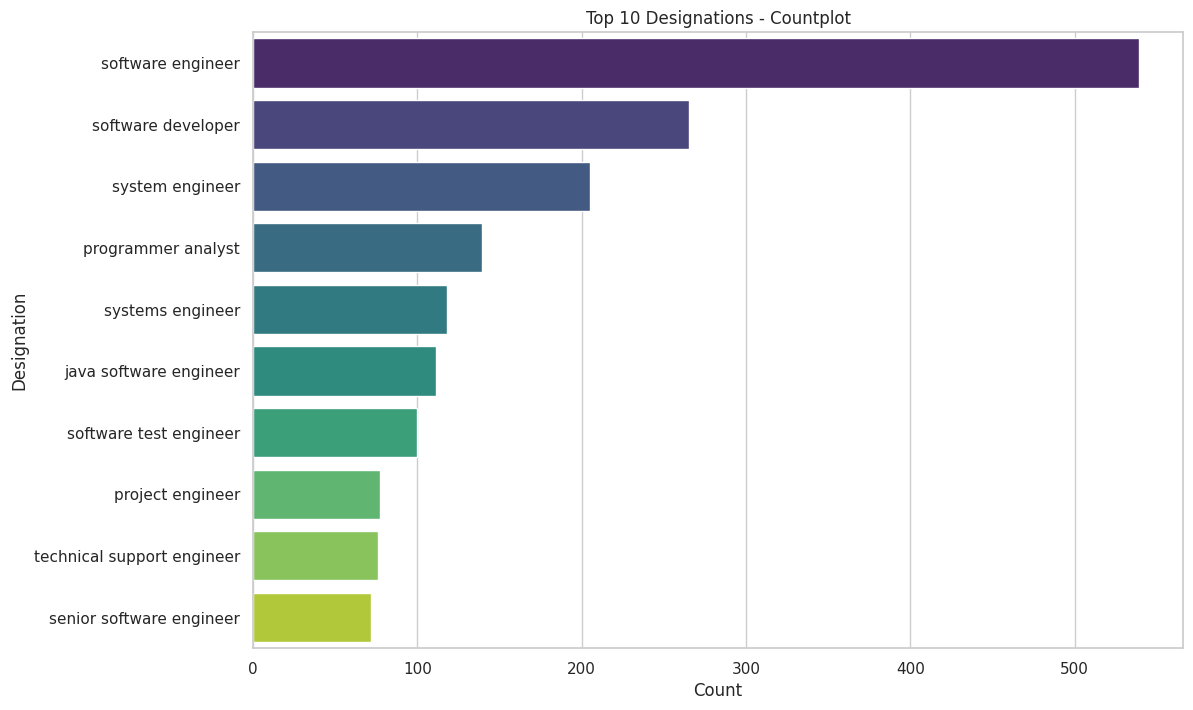

In [140]:
top_n_designations = 10
top_designations = data['Designation'].value_counts().head(top_n_designations)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_designations.values, y=top_designations.index, palette='viridis')
plt.title(f'Top {top_n_designations} Designations - Countplot')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.show()

In [141]:
# The above plot describes more number of people working as a Software Engineer

<ipython-input-142-c61ea9cae1bc>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




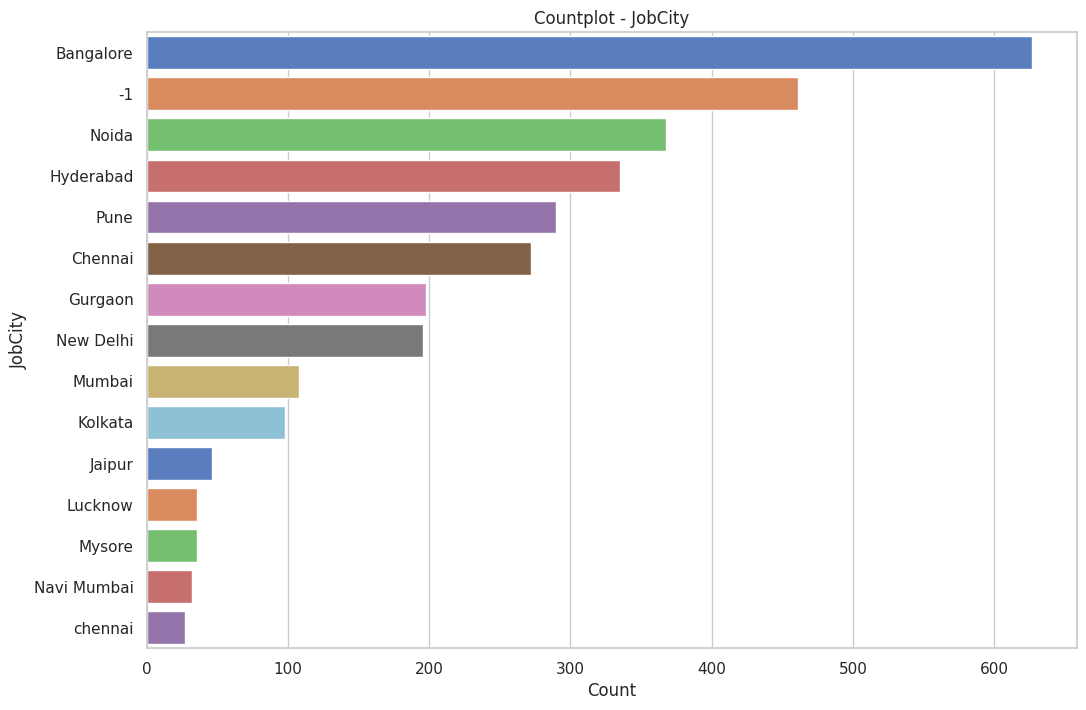

In [142]:
plt.figure(figsize=(12, 8))
jobcity_counts = data['JobCity'].value_counts().head(15)  # Displaying the top 15 cities for better visualization
sns.barplot(x=jobcity_counts.values, y=jobcity_counts.index, palette='muted')
plt.title('Countplot - JobCity')
plt.xlabel('Count')
plt.ylabel('JobCity')
plt.show()

In [143]:
# Most of the Students working in Bangalore

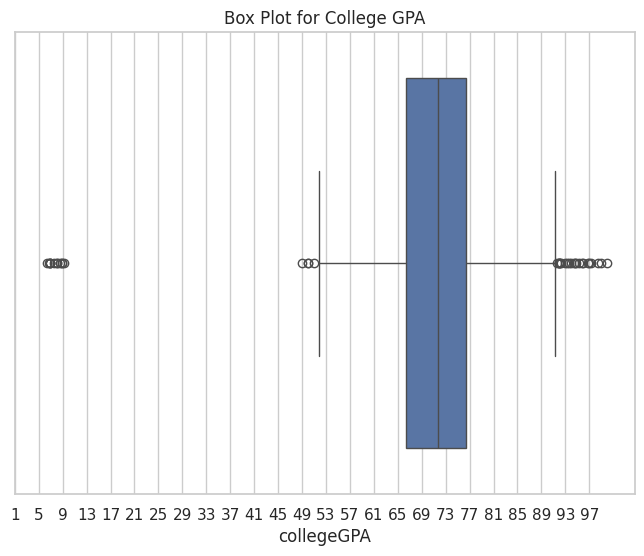

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='collegeGPA', data=data)
plt.xticks(range(1, 101,4))
plt.title('Box Plot for College GPA')
plt.show()

In [145]:
# Most of the Student has less than 10 gpa ,the total gpa might be out of 10 and also may be out of 100

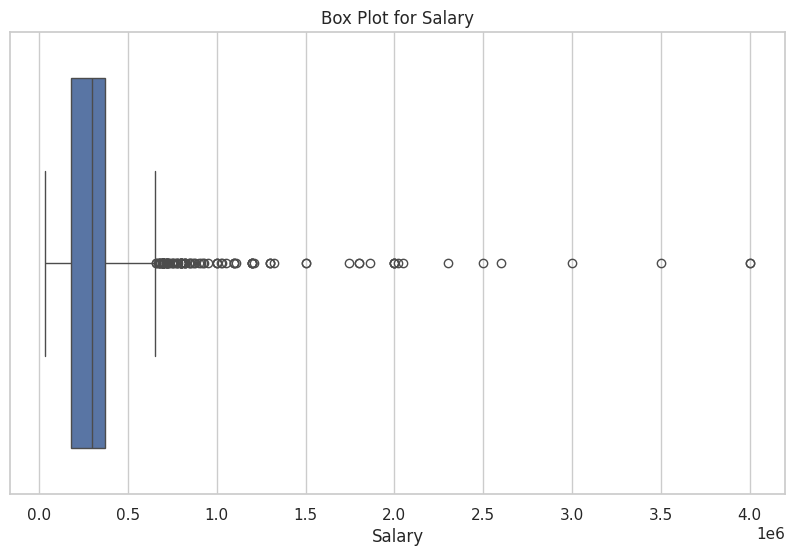

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', data=data)
plt.title('Box Plot for Salary')
plt.show()

In [147]:
max_salary_index = data['Salary'].idxmax()
highest_salary = data.loc[max_salary_index, 'Salary']
designation_with_highest_salary = data.loc[max_salary_index, 'Designation']

print(f'Highest Salary: {highest_salary}')
print(f'Designation with Highest Salary: {designation_with_highest_salary}')

Highest Salary: 4000000.0
Designation with Highest Salary: senior software engineer


In [148]:
max_salary_index = data['Salary'].idxmin()
highest_salary = data.loc[max_salary_index, 'Salary']
designation_with_highest_salary = data.loc[max_salary_index, 'Designation']

print(f'Highest Salary: {highest_salary}')
print(f'Designation with Highest Salary: {designation_with_highest_salary}')

Highest Salary: 35000.0
Designation with Highest Salary: systems engineer


In [149]:
senior_software_engineer_count = data[data['Designation'] == 'senior software engineer'].shape[0]
print("Count of Senior Software Engineer:", senior_software_engineer_count)

Count of Senior Software Engineer: 72


In [150]:
senior_software_engineer_data = data[data['Designation'].str.lower() == 'senior software engineer'][['Designation', 'Salary']]
senior_software_engineer_data

Designation     Salary
3     senior software engineer  1100000.0
26    senior software engineer   345000.0
128   senior software engineer   675000.0
169   senior software engineer   275000.0
219   senior software engineer   510000.0
...                        ...        ...
3743  senior software engineer   395000.0
3798  senior software engineer   420000.0
3801  senior software engineer   240000.0
3863  senior software engineer   400000.0
3946  senior software engineer   650000.0

[72 rows x 2 columns]

In [151]:
senior_software_engineer_data_sorted = senior_software_engineer_data.sort_values(by='Salary', ascending=False)
senior_software_engineer_data_sorted

Designation     Salary
1237  senior software engineer  4000000.0
3     senior software engineer  1100000.0
3710  senior software engineer  1100000.0
1035  senior software engineer   860000.0
2604  senior software engineer   845000.0
...                        ...        ...
2339  senior software engineer   280000.0
169   senior software engineer   275000.0
2805  senior software engineer   240000.0
3801  senior software engineer   240000.0
244   senior software engineer   215000.0

[72 rows x 2 columns]

In [152]:
senior_software_engineer_data_sorted = senior_software_engineer_data.sort_values(by='Salary')
senior_software_engineer_data_sorted

Designation     Salary
244   senior software engineer   215000.0
3801  senior software engineer   240000.0
2805  senior software engineer   240000.0
169   senior software engineer   275000.0
2339  senior software engineer   280000.0
...                        ...        ...
2604  senior software engineer   845000.0
1035  senior software engineer   860000.0
3710  senior software engineer  1100000.0
3     senior software engineer  1100000.0
1237  senior software engineer  4000000.0

[72 rows x 2 columns]

In [153]:
designation_counts = data['Designation'].value_counts()

top_n = 10
top_designations = designation_counts.nlargest(top_n).index

data['Designation'] = data['Designation'].where(data['Designation'].isin(top_designations), 'Other')

fig = px.bar(data, x='Designation', title=f'Top {top_n} Designations and Others',
             labels={'Designation': 'Top Designations'},
             color='Salary',
             category_orders={'Designation': list(top_designations) + ['Other']},
             color_continuous_scale='Viridis')

fig.update_layout(
    xaxis_title='Designation',
    yaxis_title='Count',
    showlegend=False
)
# Show the plot
fig.show()

# Bivariate Analysis

In [154]:
designations_and_salaries = data[['Designation', 'Salary']]

for index, row in designations_and_salaries.iterrows():
    print(f"Designation: {row['Designation']}, Salary: {row['Salary']}")

Designation: Other, Salary: 420000.0
Designation: Other, Salary: 500000.0
Designation: systems engineer, Salary: 325000.0
Designation: senior software engineer, Salary: 1100000.0
Designation: Other, Salary: 200000.0
Designation: system engineer, Salary: 300000.0
Designation: java software engineer, Salary: 300000.0
Designation: Other, Salary: 400000.0
Designation: Other, Salary: 600000.0
Designation: project engineer, Salary: 230000.0
Designation: Other, Salary: 600000.0
Designation: Other, Salary: 450000.0
Designation: Other, Salary: 270000.0
Designation: Other, Salary: 200000.0
Designation: java software engineer, Salary: 300000.0
Designation: Other, Salary: 350000.0
Designation: Other, Salary: 325000.0
Designation: Other, Salary: 250000.0
Designation: Other, Salary: 120000.0
Designation: software engineer, Salary: 325000.0
Designation: software engineer, Salary: 320000.0
Designation: software engineer, Salary: 200000.0
Designation: Other, Salary: 190000.0
Designation: Other, Salary:

In [155]:
fig = px.bar(designations_and_salaries, x='Salary', y='Designation', orientation='h',
             title='Designations and their Salaries',
             labels={'Salary': 'Salary', 'Designation': 'Designation'},
             width=900, height=600)

fig.show()

In [156]:
numerical_columns = ['10percentage', '12percentage', 'collegeGPA', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

fig = px.scatter_matrix(data, dimensions=numerical_columns, title="Interactive Pair Plot of Numerical Columns")

fig.update_layout(
    height=1200,
    width=1200
)
fig.show()

In [157]:
categorical_column = 'Gender'
color_scale = px.colors.sequential.Reds

for column in numerical_columns:
    fig = px.box(data, x=categorical_column, y=column, color=categorical_column,
                 color_discrete_map={categorical_column: color_scale},
                 title=f'{column} vs {categorical_column}')
    fig.show()

In [158]:
categorical_column_gender = 'Gender'
categorical_column_employment = 'EmploymentStatus'

fig = px.strip(data, x=categorical_column_gender, y=categorical_column_employment,
               title='Employment Status by Gender', color=categorical_column_employment,
               category_orders={categorical_column_employment: ['Permanent', 'Contract']},
               height=500, width=800)

fig.update_layout(xaxis_title=categorical_column_gender, yaxis_title=categorical_column_employment)

fig.show()

In [159]:
categorical_column_gender = 'Gender'
categorical_column_employment = 'EmploymentStatus'

fig = px.histogram(data, x=categorical_column_gender, color=categorical_column_employment,
                   title='Employment Status by Gender')

fig.update_layout(xaxis_title=categorical_column_gender, yaxis_title='Count')

# Show the plot
fig.show()

In [160]:
women_data = data[data['Gender'] == 'f']

fig = px.box(women_data, x='Gender', y='Salary', title='Maximum Salary for Women')

fig.update_xaxes(tickvals=[0], ticktext=['Women'])
fig.show()

In [161]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create an interactive heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(x="Numeric Columns", y="Numeric Columns", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale=px.colors.sequential.Viridis,  # Use a valid colorscale
                title='Interactive Correlation Heatmap')

# Show the plot
fig.show()

In [162]:
fig = px.scatter(data, x='10percentage', y='12percentage',
                 title='Interactive Scatter Plot for 10th Percentage vs 12th Percentage',
                 labels={'10percentage': '10th Percentage', '12percentage': '12th Percentage'},
                 )

fig.show()

In [163]:
scatter_fig = px.scatter(data, x='Salary', y='collegeGPA', color='Salary', color_continuous_scale='Blues', opacity=0.7)

hexbin = go.Histogram2d(
    x=data['Salary'],
    y=data['collegeGPA'],
    colorscale='Blues',
    colorbar=dict(title='Frequency'),
    nbinsx=50,
    nbinsy=50,
    zmin=0
)

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Scatter Plot', 'Hexbin Plot'),
    row_heights=[0.7, 0.3],
    column_widths=[0.7, 0.3]
)

fig.add_trace(scatter_fig['data'][0], row=1, col=1)

# Add hexbin plot to subplot
fig.add_trace(hexbin, row=1, col=2)

# Update layout
fig.update_layout(title='Interactive Scatter Plot with Hexbin Plot for Salary vs College GPA')

# Show the figure
fig.show()

In [164]:
scatter_fig = px.scatter(data, x='Salary', y='collegeGPA', color='Salary', color_continuous_scale='Blues', opacity=0.7)

hist_x = go.Histogram(x=data['Salary'], marker=dict(color='blue'))
hist_y = go.Histogram(y=data['collegeGPA'], marker=dict(color='blue'))

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Scatter Plot', 'Histogram (X-axis)', 'Histogram (Y-axis)'),
    row_heights=[0.7, 0.3],
    column_widths=[0.7, 0.3]
)

fig.add_trace(scatter_fig['data'][0], row=1, col=1)

fig.add_trace(hist_x, row=2, col=1)
fig.add_trace(hist_y, row=1, col=2)

fig.update_layout(title='Interactive Scatter Plot with Marginal Histograms for Salary vs College GPA')

fig.show()

In [165]:
fig = px.bar(data, x='Gender', y='10percentage',
             title='Interactive Bar Plot for Gender vs 10th Percentage',
             labels={'10percentage': '10th Percentage'},
             color='Gender'
             )

fig.show()

In [166]:
specialization_gender = data.groupby(['Gender', 'Specialization']).size().unstack().reset_index()

fig = px.bar(specialization_gender, x='Gender', y=specialization_gender.columns[1:],
             title='Interactive Stacked Bar Plot for Gender vs Specialization',
             labels={'value': 'Count'},
             )

fig.show()

In [167]:
fig = px.scatter(data, x='Salary', y='10percentage', marginal_x='histogram', marginal_y='histogram',
                 title='Interactive Joint Plot for Salary vs 10th Percentage',
                 labels={'Salary': 'Salary', '10percentage': '10th Percentage'},
                 )

fig.show()

In [168]:
experience_salary = data.groupby('YearsOfExperience')['Salary'].mean().reset_index()

fig = px.line(experience_salary, x='YearsOfExperience', y='Salary',
              title=' Line Plot for Years of Experience vs Salary',
              labels={'Salary': 'Mean Salary'},
              )

fig.show()

In [169]:
fig = px.scatter(data, x='Gender', y='Salary', size='collegeGPA', color='collegeGPA',
                 title=' Bubble Plot for Gender vs Salary vs College GPA',
                 labels={'Salary': 'Salary', 'collegeGPA': 'College GPA'},
                 )

fig.show()

In [170]:
experience_salary = data.groupby('YearsOfExperience')['Salary'].mean().reset_index()

fig = px.area(experience_salary, x='YearsOfExperience', y='Salary',
              title='Stacked Area Plot for Years of Experience vs Salary',
              labels={'Salary': 'Mean Salary'},
              )

fig.show()

In [171]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['DOB'], y=data['Salary'], mode='markers', marker=dict(color='blue'), name='Salary'))

fig.update_layout(
    title='Scatter Plot for DOB vs Salary',
    xaxis=dict(title='DOB'),
    yaxis=dict(title='Salary'),
    xaxis_rangeslider_visible=True
)

fig.show()

In [172]:
percentage_columns = ['10percentage', '12percentage', 'collegeGPA']
data_long = pd.melt(data, id_vars=['Gender'], value_vars=percentage_columns)

fig = px.bar(data_long, x='Gender', y='value', color='variable', barmode='group',
             labels={'value': 'Percentage', 'variable': 'Percentage Type'},
             title=' Bar Plot for Gender vs Percentage',
             )


fig.show()

In [173]:
model = sm.OLS(data['Salary'], sm.add_constant(data['10percentage'])).fit()

fig = px.scatter(data, x='10percentage', y='Salary', title='Interactive Regression Plot for 10th Percentage vs Salary', trendline='ols')

fig.update_layout(
    xaxis_title='10th Percentage',
    yaxis_title='Salary',
    title='Interactive Regression Plot for 10th Percentage vs Salary',
)

fig.data[1].update(line=dict(color='red'))

fig.show()

In [174]:
data['Designation'].unique()

array(['Other', 'systems engineer', 'senior software engineer',
       'system engineer', 'java software engineer', 'project engineer',
       'software engineer', 'programmer analyst', 'software developer',
       'technical support engineer', 'software test engineer'],
      dtype=object)

In [175]:
filtered_data = data[data['Salary'] >2000000]
designation_salary_counts = filtered_data[['Designation', 'Salary']].value_counts()

print(designation_salary_counts)

Designation               Salary   
Other                     2020000.0    1
                          2050000.0    1
                          2600000.0    1
                          3000000.0    1
                          3500000.0    1
                          4000000.0    1
senior software engineer  4000000.0    1
software developer        2300000.0    1
software test engineer    2500000.0    1
dtype: int64


In [176]:
filtered_data = data[data['Salary'] ==4000000]
designation_salary_counts = filtered_data[['Designation', 'Salary']].value_counts()

print(designation_salary_counts)

Designation               Salary   
Other                     4000000.0    1
senior software engineer  4000000.0    1
dtype: int64


In [177]:
selected_numerical_columns = ['Salary', '10percentage', '12percentage', 'Domain']

fig = px.scatter_matrix(data[selected_numerical_columns], dimensions=selected_numerical_columns,
                        title='Pair Plot of Selected Numerical Columns')

fig.show()

In [178]:
fig = px.box(data, x='Gender', y='Salary', title='Box Plot: Gender vs. Salary', points="all")

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Salary',
    showlegend=False
)

fig.show()

In [179]:
top_n = 10
designation_counts = data['Designation'].value_counts()
top_designations = designation_counts.nlargest(top_n).index
data['Designation'] = data['Designation'].where(data['Designation'].isin(top_designations), 'Other')

average_salary_by_designation = data.groupby('Designation')['Salary'].mean().sort_values(ascending=False)

fig = px.bar(x=average_salary_by_designation.index, y=average_salary_by_designation.values,
             title=f'Average Salary for Top {top_n} Designations and Others',
             labels={'x': 'Designation', 'y': 'Average Salary'},
             category_orders={'Designation': average_salary_by_designation.index},
             color_discrete_sequence=['blue'],  # You can customize the color
             )
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Designation', yaxis_title='Average Salary')
fig.show()

In [180]:
fig = px.bar(data, x='Gender', color='EmploymentStatus', title='Gender vs. Employment Status',
             labels={'Gender': 'Gender', 'EmploymentStatus': 'Employment Status'},
             category_orders={'EmploymentStatus': sorted(data['EmploymentStatus'].unique())},
             color_discrete_map={'Employed': 'green', 'Unemployed': 'red', 'Other': 'gray'},
             opacity=0.8)


fig.update_layout(barmode='stack')
fig.show()

In [181]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'EmploymentStatus', 'YearsOfExperience'],
      dtype='object')

In [182]:
data

Salary        DOJ                  DOL         Designation  \
0      420000.0 2012-06-01       Not Applicable               Other   
1      500000.0 2013-09-01       Not Applicable               Other   
2      325000.0 2014-06-01       Not Applicable    systems engineer   
3     1100000.0 2011-07-01       Not Applicable               Other   
4      200000.0 2014-03-01  2015-03-01 00:00:00               Other   
...         ...        ...                  ...                 ...   
3993   280000.0 2011-10-01  2012-10-01 00:00:00   software engineer   
3994   100000.0 2013-07-01  2013-07-01 00:00:00               Other   
3995   320000.0 2013-07-01       Not Applicable               Other   
3996   200000.0 2014-07-01  2015-01-01 00:00:00  software developer   
3997   400000.0 2013-02-01       Not Applicable               Other   

               JobCity Gender        DOB  10percentage  \
0            Bangalore      f 1990-02-19         84.30   
1               Indore      m 1989-10-04         85.40   
2              Chennai      f 1992-08-03         85.00   
3              Gurgaon      m 1989-12-05         85.60   
4              Manesar      m 1991-02-27         78.00   
...                ...    ...        ...           ...   
3993        New Delhi       m 1987-04-15         52.09   
3994         Hyderabad      f 1992-08-27         90.00   
3995         Bangalore      m 1991-07-03         81.86   
3996  Asifabadbanglore      f 1992-03-20         78.72   
3997           Chennai      f 1991-02-26         70.60   

                             10board  12graduation  ...  ElectricalEngg  \
0     board ofsecondary education,ap          2007  ...               0   
1                               cbse          2007  ...               0   
2                               cbse          2010  ...               0   
3                               cbse          2007  ...               0   
4                               cbse          2008  ...               0   
...                              ...           ...  ...             ...   
3993                            cbse          2006  ...               0   
3994                     state board          2009  ...               0   
3995                      bse,odisha          2008  ...               0   
3996                     state board          2010  ...               0   
3997                            cbse          2008  ...               0   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0              0          0             0.9737        0.8128       0.5269   
1              0          0            -0.7335        0.3789       1.2396   
2              0          0             0.2718        1.7109       0.1637   
3              0          0             0.0464        0.3448      -0.3440   
4              0          0            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993           0          0            -0.1082        0.3448       0.2366   
3994           0          0            -0.3027        0.8784       0.9322   
3995           0          0            -1.5765       -1.5273      -1.5051   
3996           0          0            -0.1590        0.0459      -0.4511   
3997           0          0            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  EmploymentStatus YearsOfExperience  
0         1.35490                -0.4455           Present                11  
1        -0.10760                 0.8637           Present                10  
2        -0.86820                 0.6721           Present                 9  
3        -0.40780                -0.9194           Present                12  
4         0.09163                -0.1295              Left                10  
...           ...                    ...               ...               ...  
3993      0.64980                -0.9194              Left                12  
3

## Research Questions
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [183]:
cs_engineering_jobs = data[(data['ComputerScience'] == 1) &
                         ((data['Specialization'] == 'programming analyst') |
                          (data['Specialization'] == 'software engineer') |
                          (data['Specialization'] == 'hardware engineer') |
                          (data['Specialization'] == 'associate engineer'))]

selected_columns = ['Salary', 'Designation']
filtered_data = cs_engineering_jobs[selected_columns]
print(filtered_data)

Empty DataFrame
Columns: [Salary, Designation]
Index: []


In [184]:
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])


In [185]:
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 104.46891913608455
P-value: 1.2453868176976918e-06


In [186]:
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a relationship between gender and specialization.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between gender and specialization.")

Reject the null hypothesis. There is a relationship between gender and specialization.


# Research Questions and Interesting Conclusions

1. **Impact of Education on Salary:**
   *Research Question:* Is there a correlation between the level of education (10th, 12th, graduation) and salary? Do individuals with higher educational qualifications tend to earn higher salaries?
   *Conclusion:* Higher levels of education, including academic achievements in 10th, 12th, and graduation, may positively influence salary prospects.

2. **Gender Disparities in Salaries:**
   *Research Question:* Are there significant differences in salaries between male and female employees? What factors contribute to these gender disparities in pay?
   *Conclusion:* Gender pay gap analysis reveals discrepancies in salaries between male and female employees, prompting further investigation into contributing factors.

3. **Specialization Preferences by Gender:**
   *Research Question:* Is there a correlation between gender and specialization preference among employees? Do certain specializations attract a specific gender more than others, and if so, what factors drive these preferences?
   *Conclusion:* Gender-based analysis of specialization preferences sheds light on potential biases or preferences within the workforce.

4. **Effect of Years of Experience on Job Status:**
   *Research Question:* How does the number of years of experience relate to employment status (Present or Left)? Do individuals with more experience tend to exhibit longer job tenures?
   *Conclusion:* Examination of the relationship between years of experience and employment status reveals insights into job retention patterns.

5. **Correlation between Designation and Salary:**
   *Research Question:* Is there a consistent relationship between job designations and salaries? Do certain job titles consistently command higher salaries, and does this vary across industries?
   *Conclusion:* Analysis of the correlation between job titles and salaries provides insights into salary structures across different job roles and industries.

6. **Effect of Academic Board on Job Opportunities:**
   *Research Question:* Does the type of academic board (e.g., CBSE, state board) impact job opportunities and career progression?
   *Conclusion:* Exploration of the influence of academic board on job opportunities helps understand potential biases or preferences in hiring practices.

7. **Impact of Birthdate on Employment Status:**
   *Research Question:* Is there a correlation between birthdate and employment status? Are individuals born in specific months more likely to exhibit longer job tenures?
   *Conclusion:* Investigation into the relationship between birthdate and employment status provides insights into potential factors influencing job stability.

These research questions and conclusions aim to provide a comprehensive understanding of various factors influencing salaries, employment dynamics, and career trajectories within the workforce.

In [187]:
fig = px.box(data, x='Degree', y='Salary', points="all")
fig.update_layout(title="Impact of Education on Salary")
fig.show()

In [188]:
fig = px.box(data, x='Gender', y='Salary', points="all")
fig.update_layout(title="Gender Disparities in Salaries")
fig.show()

In [189]:
fig = px.histogram(data, x='Specialization', color='Gender')
fig.update_layout(title="Specialization Preferences by Gender")
fig.update_xaxes(tickangle=45)
fig.show()

In [190]:
fig = px.box(data, x='EmploymentStatus', y='YearsOfExperience', points="all")
fig.update_layout(title="Effect of Years of Experience on Job Status")
fig.show()

In [191]:
fig = px.box(data, x='Designation', y='Salary', points="all")
fig.update_layout(title="Correlation between Designation and Salary")
fig.update_xaxes(tickangle=45)
fig.show()

In [192]:
fig = px.histogram(data, x='10board', color='EmploymentStatus')
fig.update_layout(title="Effect of Academic Board on Job Opportunities")
fig.update_xaxes(tickangle=45)
fig.show()

In [193]:
data['BirthMonth'] = data['DOB'].dt.month
fig = px.histogram(data, x='BirthMonth', color='EmploymentStatus')
fig.update_layout(title="Impact of Birthdate on Employment Status")
fig.show()

In [194]:
  fig = px.bar(data, x='Specialization', y='Salary', title="Comparison of Engineering Specializations - Salary")
  fig.update_xaxes(tickangle=45)
  fig.show()

# Additional Visualization/EDA Steps for learning more about data.

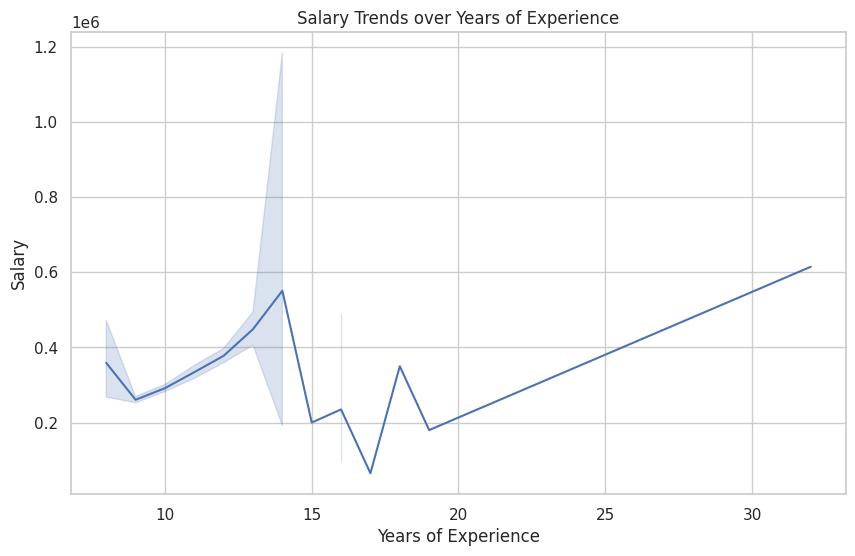

In [195]:
# 1. Time-series Analysis: Explore trends and seasonality in data over time (e.g., YearsOfExperience vs Salary).
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearsOfExperience', y='Salary', data=data)
plt.title('Salary Trends over Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [196]:
# 2. Interactive Dashboards: Create interactive dashboards using tools like Dash or Tableau for dynamic exploration of data.
# Using Plotly for interactive visualization
fig = px.scatter(data, x='Degree', y='Salary', color='Specialization', hover_data=['Gender', '10percentage'])
fig.update_layout(title='Interactive Scatter Plot - Salary vs Degree with Specialization')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



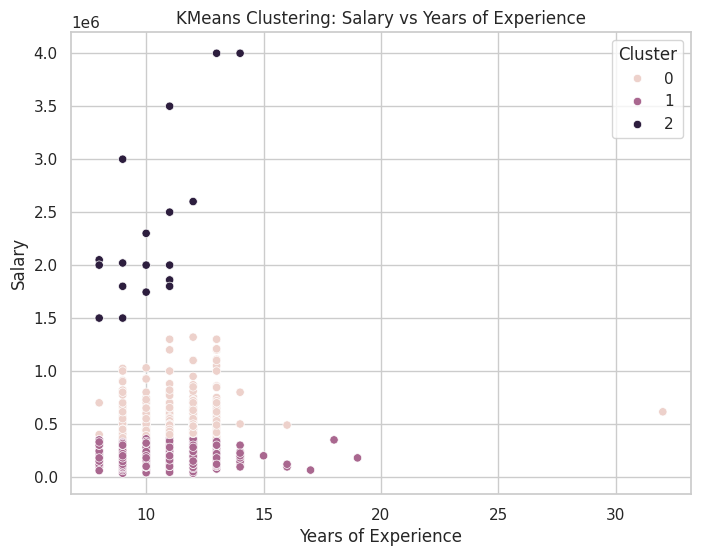

In [197]:
# 3. Clustering Analysis: Use clustering algorithms to identify groups of similar individuals based on various features.
# Using KMeans clustering on numerical features
X = data.select_dtypes(include=['float64', 'int64']).dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsOfExperience', y='Salary', hue='Cluster', data=data)
plt.title('KMeans Clustering: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

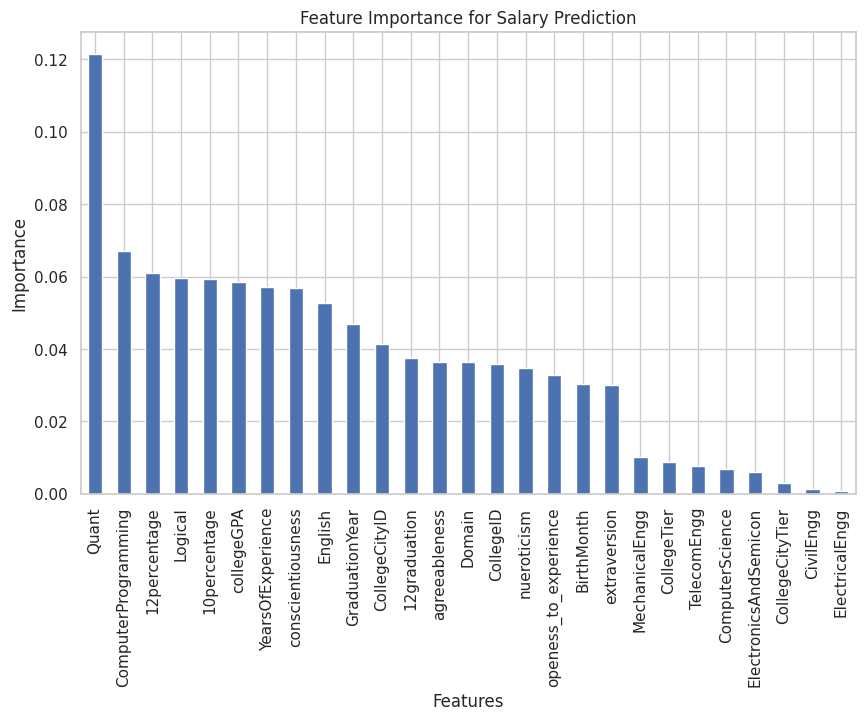

In [198]:
# 4. Feature Importance: Determine the most important features influencing salary using techniques like Random Forest feature importance.
# Using Random Forest Regression for feature importance
X = data.select_dtypes(include=['float64', 'int64']).drop(['Salary'], axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Salary Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

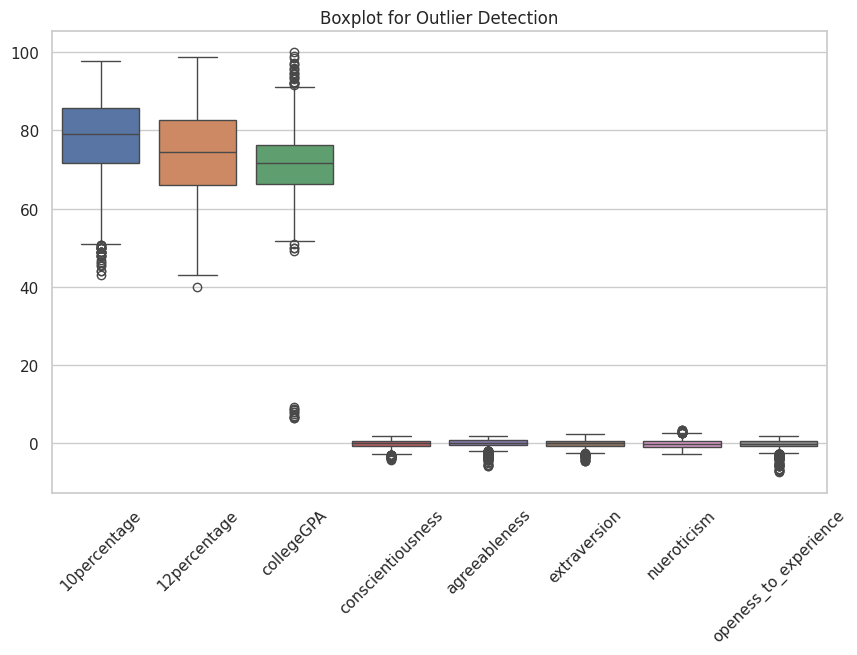

In [199]:
# 5. Outlier Detection: Identify and analyze outliers in the data that may represent unusual or erroneous observations.
# Using boxplot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

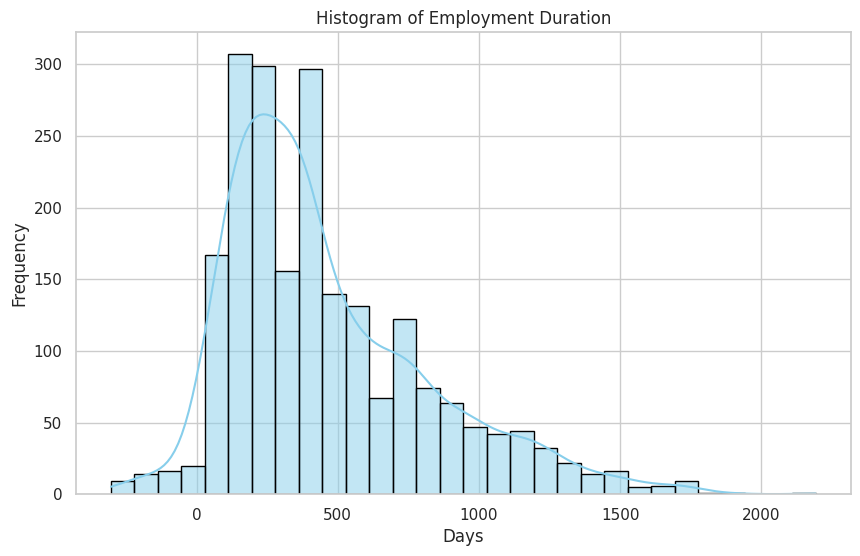

In [200]:
# 6. Time-to-Event Analysis: Analyze the time duration between joining and leaving dates for employees.
# Convert 'DOL' and 'DOJ' columns to datetime format
data['DOL'] = pd.to_datetime(data['DOL'], errors='coerce')
data['DOJ'] = pd.to_datetime(data['DOJ'])

# Calculate Employment Duration
data['EmploymentDuration'] = (data['DOL'] - data['DOJ']).dt.days

# Visualize Employment Duration
plt.figure(figsize=(10, 6))
sns.histplot(data['EmploymentDuration'].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Employment Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

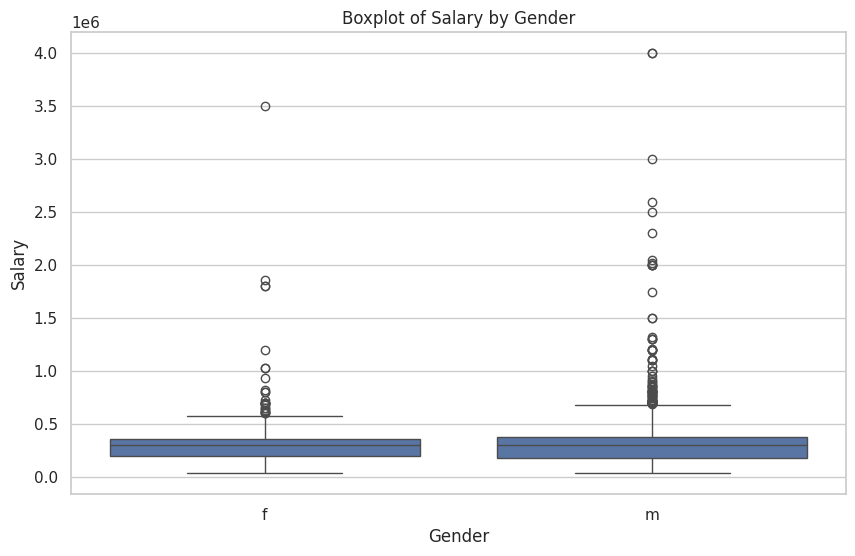

In [201]:
# 7. Comparative Analysis: Compare salary distributions across different demographic groups (e.g., Gender, Degree).
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot of Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

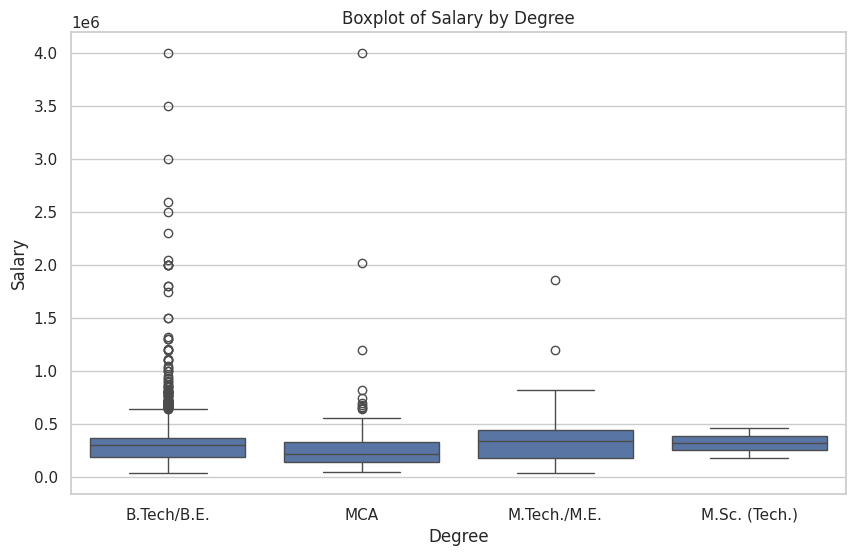

In [202]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=data)
plt.title('Boxplot of Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [203]:
# 8. Machine Learning Models: Build predictive models to estimate salary based on available features, and evaluate model performance.
# Using Linear Regression as an example
X = sm.add_constant(data[['10percentage', '12percentage', 'collegeGPA', 'YearsOfExperience']])
y = data['Salary']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     107.3
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           5.57e-87
Time:                        14:42:59   Log-Likelihood:                -54515.
No. Observations:                3998   AIC:                         1.090e+05
Df Residuals:                    3993   BIC:                         1.091e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.407e+05    4.3e+0

In [204]:
# Splitting data for machine learning models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
# Fit and evaluate the model
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 25242461687.28704


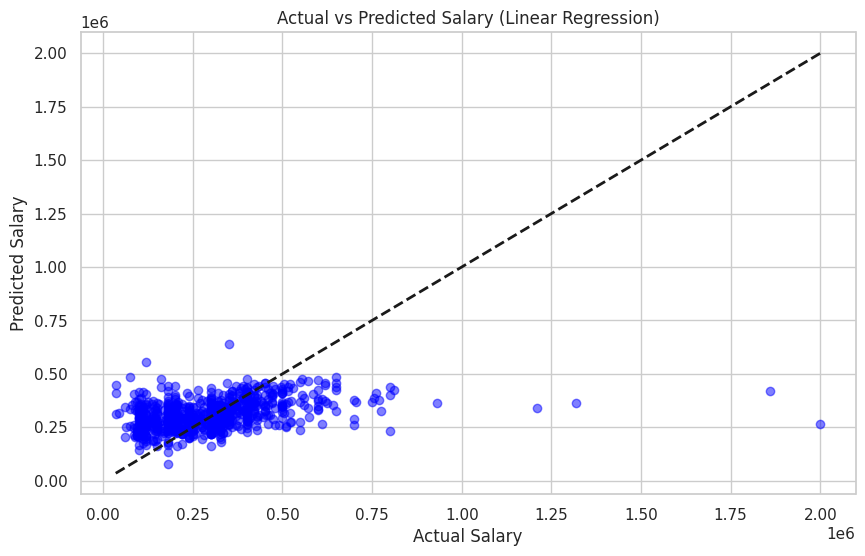

In [206]:
# Visualize the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Linear Regression)')
plt.grid(True)
plt.show()

Connect with Me:

LinkedIn: https://www.linkedin.com/in/soham-amipara/

GitHub: https://github.com/SohamAmipara/

Twitter: https://twitter.com/SB_Amipara/

Medium: https://medium.com/@soham.amipara91/

Contact:
Email: soham.amipara91@gmail.com

Feel free to reach out to me on any of these platforms if you have any queries or doubts. I'd be happy to connect with you!

THANK YOU!